# S3 - In-class Exercises: Python Basics and Supply chain Examples - Part II (Solution)

---
## Instructions:
Most of the exercises presented here allows you to practice basic Python programming for some applications in Operations Management and Logistics.

For each exercise, you have a code cell for the response underneath it, where you should write your answer between the lines containing `### start your code here ###` and `### end your code here ###`. Your code can contain one or more lines and you can execute this cell in order to complete the exercise. To execute the cell, you can type `Shift+Enter` or press the play button in the toolbar above. Your results will appear right below this response cell.

NOTE: Please pay attention to the variable name of the output you would need to provide under each question. You must use the same variable name for the output so that the result can be printed out correctly.

---
## 1. String
### Exercise 1.1: Generating reference codes for new orders
A small business would like to create its own purchase order template and assign an informative code to each new order. Create a function with the name `OrderRef`, which returns a new code in the format specified below given the following information: 

* client ID  (3 characters)
* date when the order is placed (in the format DD/MM/YYYY, e.g., 13/06/2020)
* time at which the order was placed (in the format HH:MM, e.g., 14:05)
* date when the order must be fulfilled (in the format DD/MM/YYYY)

The desired format of the code for each order is:
<div>
  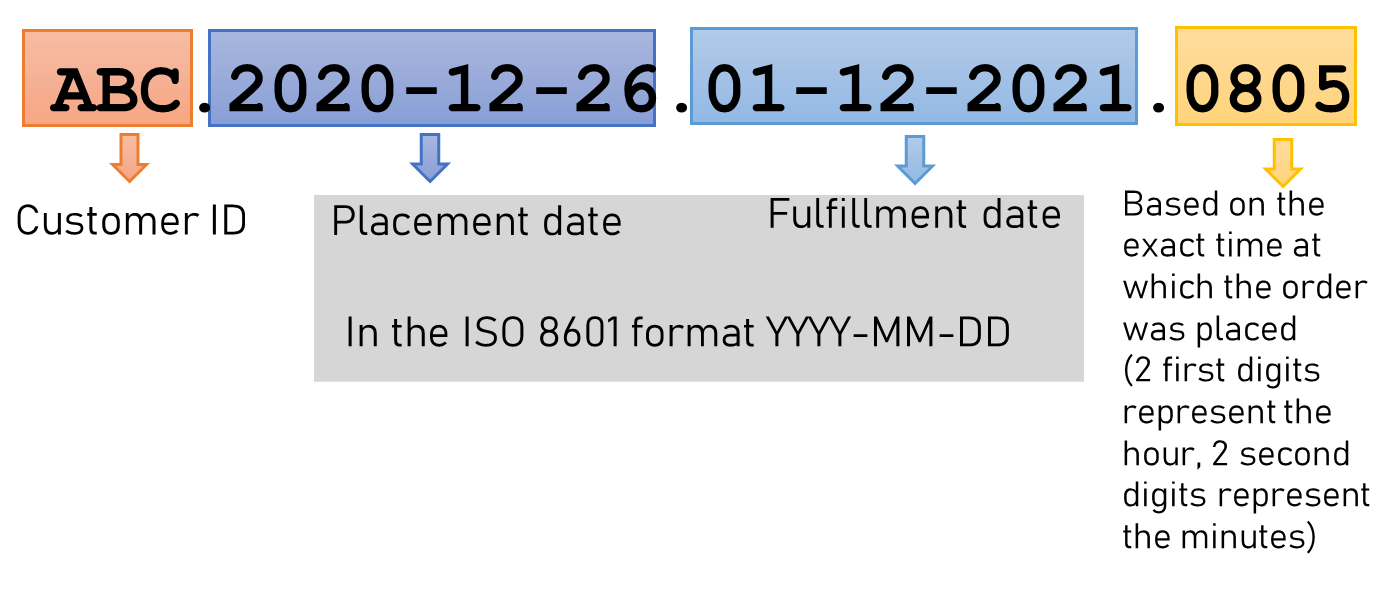
</div>

**Hint:** you can use the `.split()` method and the operator `+` to perform string concatenation.

In [2]:
### start your code here ####

# defining a function which create a reference code for each order
def OrderRef(client_id, plac_date, plac_time, fulfill_date):
    """
    Return an order code
    Parameters:
        client_id: (string) client identification number of 3 characters
        plac_date: (string) date in which the order was placed in the format DD/MM/YYYY
        plac_time: (string) time at which the order was placed in the format HH:MM
        fulfill_date: (string) date when the order must be fulfilled in the format DD/MM/YYYY)
    return:
        (string) 30 characters in the format XXX.XXXX-XX-XX.XX-XX-XXXX.XXXX 
        
    """    
    split_plac_date = plac_date.split('/')
    split_fulfill_date = fulfill_date.split('/')
    split_plac_time = plac_time.split(':')
    code =  client_id + '.' + split_plac_date[2] + '-' + split_plac_date[1] + '-' + split_plac_date[0] + "." + \
            split_fulfill_date[2] + '-' + split_fulfill_date[1] + '-' + split_fulfill_date[0] + '.'\
            + split_plac_time[0]+split_plac_time[1]
    return code

### end your code here ####

# Generating a new code for a new order
print('The code of the order placed on 13/01/2021 at 18:20 by client CA1, which should be fulfilled on 27/01/2021 is: ', 
      OrderRef('CA1', '13/01/2021', '18:20', '27/01/2021'))



The code of the order placed on 13/01/2021 at 18:20 by client CA1, which should be fulfilled on 27/01/2021 is:  CA1.2021-01-13.2021-01-27.1820


---
## 2. Lists

### Exercise 2.1: Weighted Moving Average

The **simple moving average** assumes that the last $k$ observations are of equal importance on determining the forecast.  However, in some cases, more recent data may be more representative of current demand than older data. In such cases, we may opt to use the **weighted moving average method**, where historical data can be weighted to give greater importance to data from the most recent periods. 

> **Brief description of the model:** this method computes the forecast as the weighted average demand considering the $k$ most recent periods as follows:
>
> $$F_{t+1}=w_1D_t+w_2D_{t-1}+w_3D_{t-2}+...+w_kD_{(t-k)+1}$$
> Where:
> - $F_t$: forecast for the period $t$
> - $k$: number of observations used in the calculation
> - $w_t$: weighting factor given to each one of the $k$ periods considered in the calculations.  
> - $D_t$: demand for period $t$
>
> As an example, consider that the sales in January, February, March and April were 125 units, 142 units, 120 units, and 153 units, respectively. We want to forecast the demand for May using the weighted exponential method with weighting factors $50\%$, $30\%$ and $20\%$. The forecast is computed as $F_{May}=50\%D_{April}+30\%D_{March}+20\%D_{Feb}=141$
>
>The advantage of weighted moving average method is that it reflects upward or downward trends more quickly (because recent data have more weight).

Create a function which computes the forecast for the next period using the weighted moving average method, given a list of historical data and weighting factors. This function has the following requirements. 
* It must return the message `'not enough data'` in case that the number of observations in the historical data is less than the number of weighting factors. **Hint:** you can use the `'len()` function.
* It must return the message `'ATTENTION: the sum of the weighting factors must be equal to 1'` in case that the sum of the weighting factors is different than 1. **Hint:** you can use the `'sum()` function.
* The function should make the right prediction even if the weighting factors have a differing ordering within the list. this means that, the function should always compute the forecast by giving greater importance to the most recent periods. **Hint:** you can use the `.sort()` method. Check [this page](https://www.w3schools.com/python/python_lists_sort.asp) for more information.
* Make use of list comprehensions to compute the forecast.
* The forecast should be rounded (i.e., an integer value) **Hint:** you can use the `round()` function.

In [9]:
### start your code here ####

# defining a function for the weighted moving average method
def WeigMovingAvg(historical_sales, weights):
    """
    Return the predicted demand for the next period
    parameters:
        historical_sales: (list) real sales in the previous periods
        weights: (list) weighting factors for the weighted moving avg method
    return:
        forecast_sales: (number) forecast for next period
    """
    # checking if there is enough data to make predictions
    if len(historical_sales) < len(weights):
        return 'not enough data'
    
    #checking if the weight sum is equal to 1
    if sum(weights) != 1:
        return 'ATTENTION: the sum of the weighting factors must be equal to 1'
    
    # making sure that the weights are correctly ordered 
    weights.sort()
    k_obs = len(weights)              # number of observations to consider
    data = historical_sales[-k_obs:]  # slicing  and separating the data of interest to make predictions  
    weighted_elem = [weights[k] * data[k] for k in range(k_obs)]  # creating a list with the weighted terms
        
    return sum(weighted_elem)

# Test if your function is correct using the following data 
sales = [125, 142, 120, 153, 156, 135, 128, 117, 140, 134, 132, 126]
weig_factors1 = [0.5, 0.15, 0.25, 0.1]
weig_factors2 = [0.35, 0.55, 0.1]
weig_factors3 = [0.6, 0.2, 0.3]

print('Forecast sales for the next period weig_factor1 is: ', WeigMovingAvg(sales, weig_factors1))
print('Forecast sales for the next period weig_factor2 is: ', WeigMovingAvg(sales, weig_factors2))
print('Forecast sales for the next period weig_factor3 is: ', WeigMovingAvg(sales, weig_factors3))
### end your code here ####


Forecast sales for the next period weig_factor1 is:  130.1
Forecast sales for the next period weig_factor2 is:  128.9
Forecast sales for the next period weig_factor3 is:  ATTENTION: the sume of the weighting factors must be equal to 1


---
## 3. Lists, Dictionaries and Tuples

### Exercise 3.1: Forecasting methods using dictionaries

Consider the historical data in the dictionary `sales_2020` about the vehicle sales in Canada during 2020.

(*Note: we forecast demand for future periods. In this particular exercise, you are required to forecast demand for some periods where real sales data is already available. This is just an illustration for the purpose of the exercise, so try to picture yourself at the end of May 2020 tying to make predictions for the next month, once at a time, until December 2020*)

In [2]:
# Format of the dictionary: {'month': sale volume in units}
sales_2020 = {'January':  83512,
             'February':  101788,
             'March': 148052,
             'April': 152187,
             'May': 157082,
             'June':  156891,
             'July':  150800,
             'August':  138210,
             'September': 137349,
             'October': 125731,
             'November': 118521,
             'December': 114376} 
print(sales_2020)

{'January': 83512, 'February': 101788, 'March': 148052, 'April': 152187, 'May': 157082, 'June': 156891, 'July': 150800, 'August': 138210, 'September': 137349, 'October': 125731, 'November': 118521, 'December': 114376}


Using the historical data in `sales_2020` and the function created in Exercise 2.1, forecast sales for April 2020 to December 2020 using the Weighted Moving Average method with different weighting parameters, as indicated in the next code cell. You are required to save your forecast in a nested dictionary in the following format (WMA: Weighted Moving Average):

`forecast_dic =  {'April': {'WMA_w1': XX, 'WMA_w2': XX, 'WMA_w3': XX},     
                   'May': {'WMA_w1': XX, 'WMA_w2': XX, 'WMA_w3': XX},      
                   'June': {'WMA_w1': XX, 'WMA_w2': XX, 'WMA_w3': XX},     
                   ... ,                                                   
                   'December': {'WMA_w1': XX, 'WMA_w2': XX, 'WMA_w3': XX}}`


**Hint:** you can use `for` loops, list comprehension, the constructor `.list()`, and useful dictionary methods such as `keys()`

In [22]:
# Different weightening parameters to test
w1 = [0.5, 0.2, 0.3]
w2 = [0.7, 0.1, 0.2]
w3 = [0.4, 0.3, 0.3]

### start your code here ####

# initialize the forecast_dict
forecast_dic ={'April': {},
               'May': {},
               'June':  {},
               'July':  {},
               'August':  {},
               'September': {},
               'October': {},
               'November': {},
               'December': {}} 
list_months = list(sales_2020.keys())

for t in range(3,12):  # compute preductions from the 4th month until the 2th
    
    # forcasting using w1
    f1 = WeigMovingAvg([sales_2020[list_months[tt]] for tt in range(t)], w1)
    forecast_dic[list_months[t]]['WMA_w1']= f1
    
    # forcasting using w2
    f2 = WeigMovingAvg([sales_2020[list_months[tt]] for tt in range(t)], w2)
    forecast_dic[list_months[t]]['WMA_w2']= f2
    
    # forcasting using w3
    f3 = WeigMovingAvg([sales_2020[list_months[tt]] for tt in range(t)], w3)
    forecast_dic[list_months[t]]['WMA_w3']= f3

### end your code here ####

print('Forecasting using three different methods', forecast_dic)

Forecasting using three different methods {'April': {'WMA_w1': 121264.8, 'WMA_w2': 132345.2, 'WMA_w3': 114810.8}, 'May': {'WMA_w1': 140866.7, 'WMA_w2': 146320.1, 'WMA_w3': 135826.8}, 'June': {'WMA_w1': 153807.5, 'WMA_w2': 155200.0, 'WMA_w3': 152904.5}, 'July': {'WMA_w1': 156007.5, 'WMA_w2': 156458.8, 'WMA_w3': 155537.1}, 'August': {'WMA_w1': 153883.7, 'WMA_w2': 152646.4, 'WMA_w3': 154511.9}, 'September': {'WMA_w1': 145723.2, 'WMA_w2': 142596.1, 'WMA_w3': 147591.3}, 'October': {'WMA_w1': 140297.5, 'WMA_w2': 138866.3, 'WMA_w3': 141642.6}, 'November': {'WMA_w1': 131712.2, 'WMA_w2': 129302.5, 'WMA_w3': 132960.1}, 'December': {'WMA_w1': 124449.6, 'WMA_w2': 121845.8, 'WMA_w3': 126332.4}}


### Exercise 3.2: Selecting the most precise method

Here you will select the most precise method among the ones you used for forecasting sales in the previous exercise. The choice of the most precise value is based on the Mean Squared Error (MSE). MSE measures the quadratic deviation of forecast and actual data according to the following equation.

$$ MSE = \frac{1}{T}\sum_{t=1}^{T}(D_t-F_t)^2$$

* $D_t$: demand realization at period $t$
* $F_t$: demand forecast at period $t$
* $T$: number of periods in the planning horizon. 

Create a function with the name `BestMethod` which returns the name of the most precise forecasting method and the MSE value as a tuple. This function should take two arguments: dictionary `sales_2020`, which contains real demand; and dictionary `forecast_dic`, which contains forecasted data (the dictionary you populated in the previous exercise). 

In [30]:
### start your code here ####
def BestMethod(real_sales, forecast):
    """
    Determines the most precise method
    parameters:
        real_sales: (dictionary) contains real sales
        forecast: (nested dictionary) contains forecast sales using different methods in the format: 
                  forecast = {'period_name': {'method1_name': forecast_method1, 'method2_name': forecast ,...},...}
    return:
        (tuple): (name of the best method, MSE)
    """
    # save the list of months with forescast
    list_months = list(forecast.keys())
    
    #save the list of methods tested
    list_methods = list(forecast[list_months[0]].keys())
    
    MSE = []   # initializing a list to save the MSE of each method
    for i in list_methods:
        squared_error = [(real_sales[j]-forecast[j][i]) ** 2 for j in list_months]  # comput. the individual squared errors
        print(i)
        print(squared_error)
        MSE.append(sum(squared_error)/len(squared_error))   #saving the MSE in the list
    print('The MSE for all method is ', MSE) 
    
    return (list_methods[MSE.index( min(MSE))], min(MSE))

### end your code here ####

print("The most precise method and the corresponding MSE value is: ", BestMethod(sales_2020, forecast_dic))

WMA_w1
[956182452.8399998, 262935954.08999962, 9507972.25, 27118056.25, 245664871.69000036, 70127225.6400002, 212182922.25, 174007757.4400003, 101477416.96000011]
WMA_w2
[393697027.23999953, 115818491.60999988, 2859481.0, 32022017.439999867, 208409644.95999983, 27532058.41000006, 172536106.0899997, 116240742.25, 55797912.040000044]
WMA_w3
[1396980326.4399998, 451783527.0400005, 15892182.25, 22440116.410000056, 265751943.6099998, 104904709.28999977, 253179014.56000018, 208487608.81000018, 142955500.95999986]
The MSE for all method is  [228800514.3788889, 124990386.78222209, 318041658.81888896]
('WMA_w2', 124990386.78222209)
